In [20]:
import os
import glob
from sklearn import preprocessing
import sklearn as skl
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [21]:
data_df = pd.read_pickle('processed_validation_data_df.pkl')

In [22]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df, test_size = .90, random_state=0)

In [23]:
print("Train Size = {} | Test Size = {} | Test is {}% of Train".format(len(train_df),len(test_df), len(test_df)/len(data_df)))

Train Size = 282787 | Test Size = 2545089 | Test is 0.9000002121733768% of Train


In [24]:
train_df.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.827870e+05,282787.000000,282787.000000,2.827870e+05,2.827870e+05,282787.000000,282787.000000,282787.000000,282787.000000,282787.000000,...,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,282787.000000
mean,1.473112e+07,9.560998,10.774311,5.974760e+02,1.643504e+04,209.518942,18.620711,58.701718,69.877096,867.601389,...,-5.966037e+03,8.045510e+04,4.193717e+04,1.527933e+05,5.644794e+04,8.238116e+06,5.166213e+05,8.628472e+06,7.832892e+06,1.062043
std,3.360160e+07,742.557060,1007.094192,2.486795e+04,2.204908e+06,730.341538,60.295899,188.490010,286.713188,1938.836574,...,1.755734e+06,5.950294e+05,3.974262e+05,9.858843e+05,5.033897e+05,2.349453e+07,4.678662e+06,2.426009e+07,2.321777e+07,2.575128
min,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.540000e+02,2.000000,1.000000,8.000000e+00,0.000000e+00,6.000000,0.000000,6.000000,0.000000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,3.128100e+04,2.000000,2.000000,6.200000e+01,1.220000e+02,37.000000,2.000000,34.000000,0.000000,79.000000,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,3.151147e+06,5.000000,4.000000,1.870000e+02,4.820000e+02,81.000000,36.000000,50.000000,26.162951,281.000000,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,1.200000e+08,199565.000000,268604.000000,1.290000e+07,5.850000e+08,24820.000000,2065.000000,4575.218750,5796.500690,14480.000000,...,7.800000e+01,6.360000e+07,7.000000e+07,9.900000e+07,6.360000e+07,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,14.000000


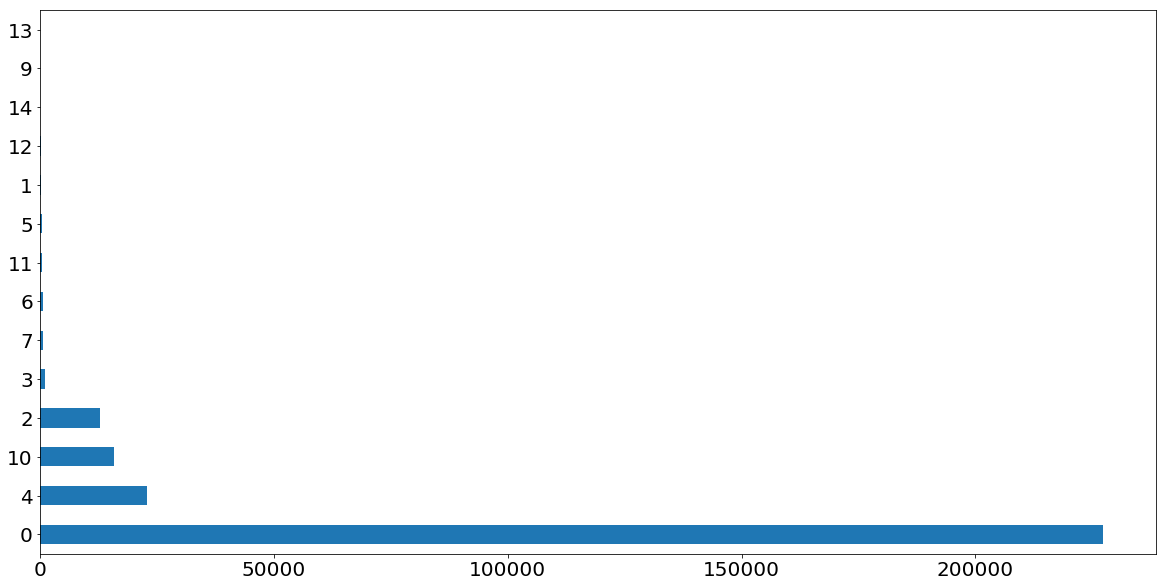

In [25]:
train_attack_types = train_df['Label'].value_counts()
test_attack_types = test_df['Label'].value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

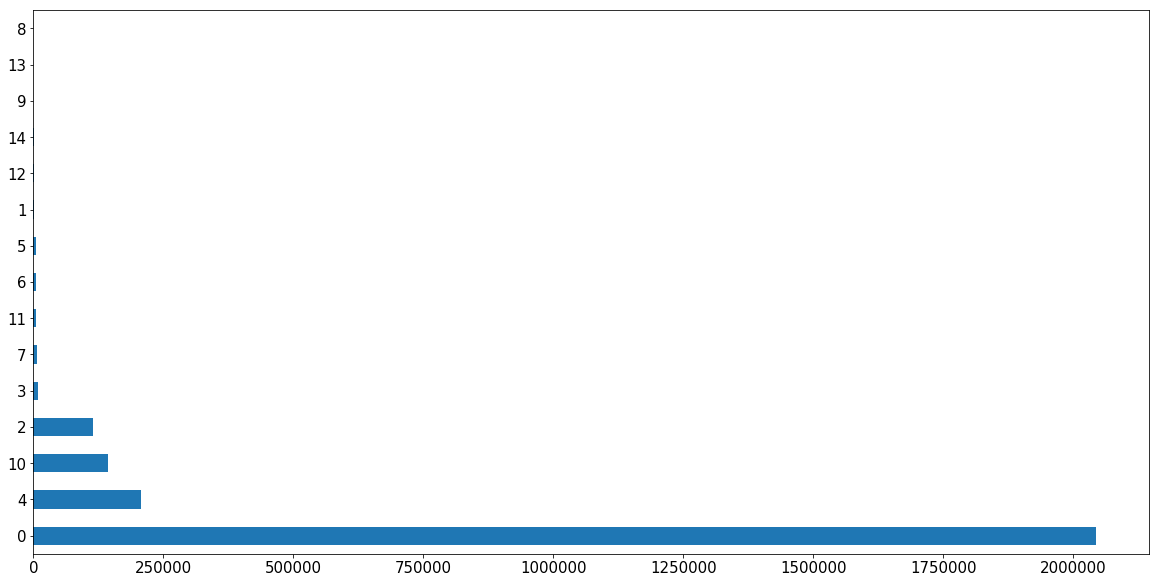

In [26]:
test_attack_types.plot(kind='barh', figsize=(20,10), fontsize=15)

In [27]:
train_Y = train_df['Label']
train_x_raw = train_df.drop(['Label'], axis=1)
test_Y = test_df['Label']
test_x_raw = test_df.drop(['Label'], 
                          axis=1)

In [28]:
combined_df_raw = pd.concat([train_x_raw, test_x_raw])

train_x = combined_df_raw[:len(train_x_raw)]
test_x = combined_df_raw[len(train_x_raw):]


train_x.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827870e+05,282787.000000,282787.000000,2.827870e+05,2.827870e+05,282787.000000,282787.000000,282787.000000,282787.000000,282787.000000,...,282787.000000,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05,2.827870e+05
mean,1.473112e+07,9.560998,10.774311,5.974760e+02,1.643504e+04,209.518942,18.620711,58.701718,69.877096,867.601389,...,5.119595,-5.966037e+03,8.045510e+04,4.193717e+04,1.527933e+05,5.644794e+04,8.238116e+06,5.166213e+05,8.628472e+06,7.832892e+06
std,3.360160e+07,742.557060,1007.094192,2.486795e+04,2.204908e+06,730.341538,60.295899,188.490010,286.713188,1938.836574,...,578.631631,1.755734e+06,5.950294e+05,3.974262e+05,9.858843e+05,5.033897e+05,2.349453e+07,4.678662e+06,2.426009e+07,2.321777e+07
min,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.540000e+02,2.000000,1.000000,8.000000e+00,0.000000e+00,6.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.128100e+04,2.000000,2.000000,6.200000e+01,1.220000e+02,37.000000,2.000000,34.000000,0.000000,79.000000,...,1.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.151147e+06,5.000000,4.000000,1.870000e+02,4.820000e+02,81.000000,36.000000,50.000000,26.162951,281.000000,...,2.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,199565.000000,268604.000000,1.290000e+07,5.850000e+08,24820.000000,2065.000000,4575.218750,5796.500690,14480.000000,...,189375.000000,7.800000e+01,6.360000e+07,7.000000e+07,9.900000e+07,6.360000e+07,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [29]:
# Example statistics for the 'duration' feature before scaling
train_x['Flow Duration'].describe()

count    2.827870e+05
mean     1.473112e+07
std      3.360160e+07
min     -1.000000e+00
25%      1.540000e+02
50%      3.128100e+04
75%      3.151147e+06
max      1.200000e+08
Name: Flow Duration, dtype: float64

In [30]:
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['Flow Duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    2.827870e+05
mean     6.532871e-19
std      1.000002e+00
min     -4.384060e-01
25%     -4.384014e-01
50%     -4.374751e-01
75%     -3.446262e-01
max      3.132859e+00
dtype: float64

In [31]:
# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

count    282787.000000
mean          0.122759
std           0.280013
min           0.000000
25%           0.000001
50%           0.000261
75%           0.026260
max           1.000000
dtype: float64

In [32]:
# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

count    282787.000000
mean          4.665144
std          10.663813
min          -0.009928
25%          -0.009878
50%           0.000000
75%           0.990122
max          38.073305
dtype: float64

In [33]:
# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler()

print(type(train_x))

train_x_scaled = pd.DataFrame(standard_scaler.fit_transform(train_x), columns=train_x.columns)

test_x_scaled = pd.DataFrame(standard_scaler.fit_transform(test_x), columns=test_x.columns)

<class 'pandas.core.frame.DataFrame'>


In [34]:
train_Y_bin = train_Y
test_Y_bin = test_Y
type(test_x_scaled)

pandas.core.frame.DataFrame

In [35]:
print(len(train_Y), len(train_x_scaled))

282787 282787


In [36]:
test_x_scaled.to_pickle('validation_test_x.pkl')
test_Y.to_pickle('validation_test_Y.pkl')

In [37]:
test_x_scaled.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.439230,-0.009785,-0.008389,-0.081972,-0.007107,-0.274570,-0.310483,-0.283501,-0.217658,-0.444638,...,-0.006933,0.002460,-0.124901,-0.104518,-0.148825,-0.100110,-0.352292,-0.109416,-0.357228,-0.339386
1,-0.439739,-0.009785,-0.008389,-0.071678,-0.006898,-0.235468,0.335620,-0.103310,-0.245367,-0.322979,...,-0.006933,0.002447,-0.124901,-0.104518,-0.148825,-0.100110,-0.352292,-0.109416,-0.357228,-0.339386
2,-0.439743,-0.009785,-0.010395,-0.081818,-0.007113,-0.281553,-0.211083,-0.280811,-0.245367,-0.447718,...,-0.006933,0.002447,-0.124901,-0.104518,-0.148825,-0.100110,-0.352292,-0.109416,-0.357228,-0.339386
3,-0.436862,-0.009785,-0.008389,-0.073215,-0.006985,-0.242451,0.252786,-0.130204,-0.245367,-0.373285,...,-0.006933,0.002447,-0.124901,-0.104518,-0.148825,-0.100110,-0.352292,-0.109416,-0.357228,-0.339386
4,-0.219320,-0.001795,-0.006383,-0.075058,-0.002004,-0.262002,-0.310483,-0.275433,-0.225215,4.049021,...,0.000844,0.002447,1.735827,-0.104518,1.032962,1.982027,-0.090851,-0.109416,-0.103655,-0.074978
